<a href="https://colab.research.google.com/github/gabrielcn/Bike_Sharing/blob/main/cyclistic_bike_share_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Compartilhamento de bicicletas em Chicago - 2016 (Divvy)***


In [ ]:
import pandas as pd #Importa a biblioteca pandas para ler o arquivo
import seaborn as sns #Importa a biblioteca seaborn
import matplotlib.pyplot as plt #Importa a bilbioteca matplotlib
import csv 
from datetime import datetime #operações para analisar datas

In [ ]:
df_chicago = pd.read_excel("Chicago-2016-Summary.xlsx") #Atribui a uma variável 

In [ ]:
df_chicago

,duration,month,hour,day_of_week,user_type
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,10,1,Saturday,Subscriber
72127,7.866667e+15,10,1,Saturday,Subscriber
72128,1.781667e+16,10,0,Saturday,Customer
72129,2.486667e+16,10,0,Saturday,Subscriber


In [ ]:
df_chicago.shape #Formato da tabela

(72131, 5)

In [ ]:
df_chicago.columns = ["duracao" , "mes" , "hora" , "dia_semana", "tipo_usuario"] #renomear colunas [] lista (columns é um atributo do pandas)
df_chicago.head()

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber


In [ ]:
df_chicago['mes'].unique() #Todos os valores que foram colocados na coluna mes

array([ 3,  2,  1,  4,  5,  6,  9,  8,  7, 12, 11, 10])

In [ ]:
df_chicago['mes'].value_counts() #Quantas vezes em cada mes

7     10286
8      9810
6      9794
9      8700
5      7211
10     7160
11     4811
4      4567
3      3719
2      2394
1      1901
12     1778
Name: mes, dtype: int64

In [ ]:
df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

**Quantidade de viagens por dia no ano de 2016**

In [ ]:
qtd_viagem_por_dia_chicago = df_chicago['dia_semana'].value_counts() #Quantas vezes em cada dia

In [ ]:
qtd_viagem_por_dia_chicago #Chicago

Monday       11286
Tuesday      10911
Friday       10741
Thursday     10008
Saturday      9927
Sunday        9654
Wednesday     9604
Name: dia_semana, dtype: int64

In [ ]:
qtd_viagem_por_dia_chicago.to_frame()

,dia_semana
Monday,11286
Tuesday,10911
Friday,10741
Thursday,10008
Saturday,9927
Sunday,9654
Wednesday,9604


In [ ]:
df_qtd_viagem_por_dia_chicago = qtd_viagem_por_dia_chicago.to_frame().reset_index()

In [ ]:
df_qtd_viagem_por_dia_chicago #Quantidade total de viagens por dia em 2016

,index,dia_semana
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


In [ ]:
df_qtd_viagem_por_dia_chicago.columns = ["dias", "total"]
df_qtd_viagem_por_dia_chicago

,dias,total
0,Monday,11286
1,Tuesday,10911
2,Friday,10741
3,Thursday,10008
4,Saturday,9927
5,Sunday,9654
6,Wednesday,9604


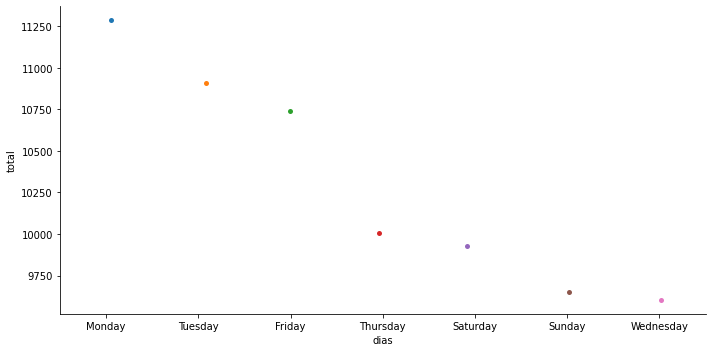

In [ ]:
sns.catplot(x="dias", y="total", data = df_qtd_viagem_por_dia_chicago, aspect = 2)

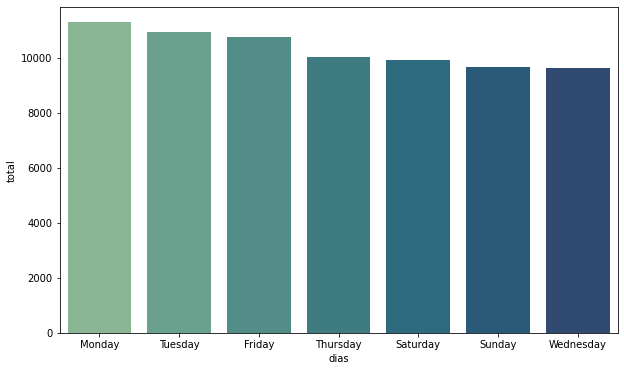

In [ ]:
plt.figure(figsize=(10,6)) #Configura o tamanho da figura (10 para direita e 6 para baixo)
sns.barplot(x="dias", y="total", data = df_qtd_viagem_por_dia_chicago, palette = "crest") #pallete, atributo que permite escolher um palete de cor, no caso é crest

**Análise de usuários de (tipo/hora/mes)**



In [ ]:
df_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,3,23,Thursday,Subscriber
1,3.300000e+00,3,22,Thursday,Subscriber
2,2.066667e+15,3,22,Thursday,Subscriber
3,1.968333e+16,3,22,Thursday,Subscriber
4,1.093333e+16,3,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,10,1,Saturday,Subscriber
72127,7.866667e+15,10,1,Saturday,Subscriber
72128,1.781667e+16,10,0,Saturday,Customer
72129,2.486667e+16,10,0,Saturday,Subscriber


In [ ]:
df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Subscriber" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

54982

In [ ]:
subscriber_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Subscriber'].value_counts().sum()

In [ ]:
df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum() #Localiza a coluna tipo_usuario e conta todos que são "Customer" e a função sum, soma tudo.
#Obs: Não sabemos se tem usuário repetido na tabela, vamos usar a abordagem de frequencia para saber se usuários cadastrados são mais frequentes que usuários customizados

17149

In [ ]:
customer_chicago = df_chicago.loc[df_chicago.tipo_usuario=='Customer'].value_counts().sum()

In [ ]:
54982 + _

72131

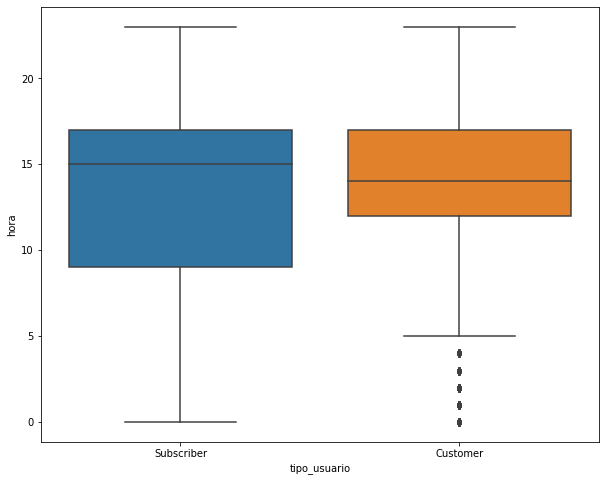

In [ ]:
plt.figure(figsize=(10,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.boxplot(x="tipo_usuario", y="hora", data = df_chicago) 
# Grafico mostra que mostra a frequencia dos tipos de usuários em relação ao horário e o desvio padrão (standart deviation)

**Análise de viagens por hora e por mes**

In [ ]:
df_chicago['hora'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  4,  0,  5,  2,  3,  1])

In [ ]:
df_chicago['hora'].value_counts() #Quantidade de viagens no ano de 2016 por horário

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [ ]:
qtd_viagem_hora_chicago = df_chicago['hora'].value_counts()

In [ ]:
qtd_viagem_hora_chicago

17    8564
16    6622
18    5786
8     5454
15    4739
13    4313
7     4256
12    4208
14    4199
19    3905
11    3693
9     3190
10    2820
20    2519
6     2024
21    1925
22    1346
23     822
5      538
0      482
1      326
2      175
4      137
3       88
Name: hora, dtype: int64

In [ ]:
qtd_viagem_hora_chicago.to_frame().reset_index()

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [ ]:
qtd_viagem_hora_chicago = qtd_viagem_hora_chicago.to_frame().reset_index()

In [ ]:
qtd_viagem_hora_chicago

,index,hora
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


In [ ]:
qtd_viagem_hora_chicago.columns = ["hora", "total"]
qtd_viagem_hora_chicago

,hora,total
0,17,8564
1,16,6622
2,18,5786
3,8,5454
4,15,4739
5,13,4313
6,7,4256
7,12,4208
8,14,4199
9,19,3905


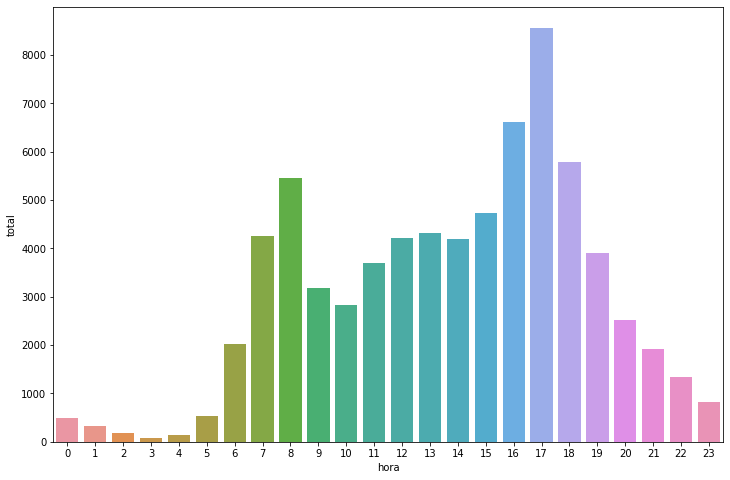

In [ ]:
plt.figure(figsize=(12,8)) #Configura o tamanho da figura (10 para direita e 8 para baixo)
sns.barplot(x="hora", y="total", data = qtd_viagem_hora_chicago)
# Quantidade total de viagens de todos os usuários por horário

In [ ]:
#Substitui valores da coluna por condição em pandas
df_chicago.loc[df_chicago.mes==1, "mes"]='jan'
df_chicago.loc[df_chicago.mes==2, "mes"]='fev'
df_chicago.loc[df_chicago.mes==3, "mes"]='mar'
df_chicago.loc[df_chicago.mes==4, "mes"]='abr'
df_chicago.loc[df_chicago.mes==5, "mes"]='mai'
df_chicago.loc[df_chicago.mes==6, "mes"]='jun'
df_chicago.loc[df_chicago.mes==7, "mes"]='jul'
df_chicago.loc[df_chicago.mes==8, "mes"]='ago'
df_chicago.loc[df_chicago.mes==9, "mes"]='set'
df_chicago.loc[df_chicago.mes==10, "mes"]='out'
df_chicago.loc[df_chicago.mes==11, "mes"]='nov'
df_chicago.loc[df_chicago.mes==12, "mes"]='dez'

In [ ]:
df_chicago['mes'].value_counts() #Quantidade de viagens por mes em Chicago

jul    10286
ago     9810
jun     9794
set     8700
mai     7211
out     7160
nov     4811
abr     4567
mar     3719
fev     2394
jan     1901
dez     1778
Name: mes, dtype: int64

In [ ]:
qtd_viagem_mes_chicago = df_chicago['mes'].value_counts() 

In [ ]:
qtd_viagem_mes_chicago.to_frame().reset_index()

,index,mes
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


In [ ]:
qtd_viagem_mes_chicago = qtd_viagem_mes_chicago.to_frame().reset_index()

In [ ]:
qtd_viagem_mes_chicago

,index,mes
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


In [ ]:
qtd_viagem_mes_chicago.columns = ["mes", "total"]
qtd_viagem_mes_chicago

,mes,total
0,jul,10286
1,ago,9810
2,jun,9794
3,set,8700
4,mai,7211
5,out,7160
6,nov,4811
7,abr,4567
8,mar,3719
9,fev,2394


In [ ]:
customer_chicago

17149

In [ ]:
subscriber_chicago

54982

In [ ]:
df_usuarios_chicago = {
    'tipo' : ['subscriber', 'customer'],
    'total' : [subscriber_chicago, customer_chicago]
    # {} dicionário do python
}

df_usuarios_chicago

{'tipo': ['subscriber', 'customer'], 'total': [54982, 17149]}

In [ ]:
pd.DataFrame(df_usuarios_chicago) #Cria ou transforma em dataframe em cima de 'df_usuarios_chicago' que acabei de criar como dicionario

,tipo,total
0,subscriber,54982
1,customer,17149


In [ ]:
df_usuarios_chicago = pd.DataFrame(df_usuarios_chicago) #É um costume sobrescrever a variável, mas não é necessário
df_usuarios_chicago

,tipo,total
0,subscriber,54982
1,customer,17149


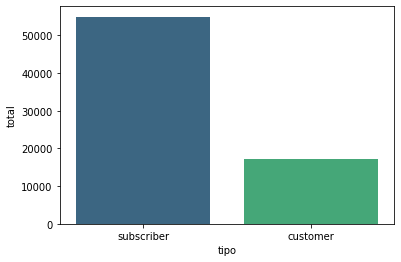

In [ ]:
sns.barplot(x="tipo", y="total", data = df_usuarios_chicago, palette = "viridis") #Gráfico de barras com seaborn, definindo o "tipo" no eixo x e o "total" no eixo y, extraido do DF df_usuarios_chicago


In [ ]:
df_chicago.groupby("tipo_usuario").mean()["duracao"] # Duração média por tipo de usuário

tipo_usuario
Customer      1.216451e+16
Subscriber    8.572488e+15
Name: duracao, dtype: float64

In [ ]:
df_chicago.groupby("tipo_usuario").median()["duracao"] # Mediana

tipo_usuario
Customer      9.633333e+15
Subscriber    6.733333e+15
Name: duracao, dtype: float64

**Analisando a frequencia de usuários customizados e usuários cadastrados**

In [ ]:
total_tipo_usuarios_chicago = df_chicago.tipo_usuario.value_counts()

In [ ]:
total_tipo_usuarios_chicago

Subscriber    54982
Customer      17149
Name: tipo_usuario, dtype: int64

In [ ]:
df_chicago2 = df_chicago.copy() #Cria uma cópia do df_chicago_copy

In [ ]:
df_chicago2

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,mar,23,Thursday,Subscriber
1,3.300000e+00,mar,22,Thursday,Subscriber
2,2.066667e+15,mar,22,Thursday,Subscriber
3,1.968333e+16,mar,22,Thursday,Subscriber
4,1.093333e+16,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72126,3.883333e+16,out,1,Saturday,Subscriber
72127,7.866667e+15,out,1,Saturday,Subscriber
72128,1.781667e+16,out,0,Saturday,Customer
72129,2.486667e+16,out,0,Saturday,Subscriber


Obs: O Pandas permite filtrar um DataFrame pelos dados de sua coluna. Por exemplo, queremos pegar do data frame de chicago a coluna que define o tipe de usuario e com base nisso, queremos as linhas que são iguais a "Subscriber"

In [ ]:
filtro_sub_chicago = df_chicago2['tipo_usuario'] == "Subscriber"

In [ ]:
subscriber_chicago = df_chicago2[filtro_sub_chicago]

In [ ]:
subscriber_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
0,1.543333e+16,mar,23,Thursday,Subscriber
1,3.300000e+00,mar,22,Thursday,Subscriber
2,2.066667e+15,mar,22,Thursday,Subscriber
3,1.968333e+16,mar,22,Thursday,Subscriber
4,1.093333e+16,mar,22,Thursday,Subscriber
...,...,...,...,...,...
72125,2.073333e+16,out,1,Saturday,Subscriber
72126,3.883333e+16,out,1,Saturday,Subscriber
72127,7.866667e+15,out,1,Saturday,Subscriber
72129,2.486667e+16,out,0,Saturday,Subscriber


In [ ]:
subscriber_chicago.mes.value_counts()

jun    7182
ago    7053
jul    6963
set    6346
out    5668
mai    5199
nov    4144
abr    3550
mar    3154
fev    2166
jan    1839
dez    1718
Name: mes, dtype: int64

In [ ]:
freq_subscriber_mes_chicago = subscriber_chicago.mes.value_counts()

In [ ]:
freq_subscriber_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jun,7182
ago,7053
jul,6963
set,6346
out,5668
mai,5199
nov,4144
abr,3550
mar,3154
fev,2166


In [ ]:
freq_subscriber_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


In [ ]:
freq_subscriber_mes_chicago = freq_subscriber_mes_chicago.to_frame().reset_index()

In [ ]:
freq_subscriber_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_subscriber_mes_chicago

,mes,total
0,jun,7182
1,ago,7053
2,jul,6963
3,set,6346
4,out,5668
5,mai,5199
6,nov,4144
7,abr,3550
8,mar,3154
9,fev,2166


In [ ]:
filtro_cust_chicago = df_chicago2['tipo_usuario'] == "Customer" 

In [ ]:
customer_chicago = df_chicago2[filtro_cust_chicago]

In [ ]:
customer_chicago

,duracao,mes,hora,dia_semana,tipo_usuario
23,2.181667e+16,mar,18,Thursday,Customer
39,2.231667e+16,mar,17,Thursday,Customer
63,2.636667e+16,mar,16,Thursday,Customer
65,1.233333e+16,mar,16,Thursday,Customer
69,2.570000e+01,mar,15,Thursday,Customer
...,...,...,...,...,...
72121,8.650000e+00,out,5,Saturday,Customer
72122,3.736667e+15,out,4,Saturday,Customer
72123,8.850000e+00,out,2,Saturday,Customer
72124,2.036667e+16,out,2,Saturday,Customer


In [ ]:
customer_chicago.mes.value_counts()

jul    3323
ago    2757
jun    2612
set    2354
mai    2012
out    1492
abr    1017
nov     667
mar     565
fev     228
jan      62
dez      60
Name: mes, dtype: int64

In [ ]:
freq_customer_mes_chicago = customer_chicago.mes.value_counts()

In [ ]:
freq_customer_mes_chicago.to_frame() #Transforma uma serie em DataFrame

,mes
jul,3323
ago,2757
jun,2612
set,2354
mai,2012
out,1492
abr,1017
nov,667
mar,565
fev,228


In [ ]:
freq_customer_mes_chicago.to_frame().reset_index() #reseta o index, adicionando mais uma coluna

,index,mes
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228


In [ ]:
freq_customer_mes_chicago = freq_customer_mes_chicago.to_frame().reset_index() 

In [ ]:
freq_customer_mes_chicago.columns = ["mes", "total"] # Renomeia as colunas do DataFrame
freq_customer_mes_chicago

,mes,total
0,jul,3323
1,ago,2757
2,jun,2612
3,set,2354
4,mai,2012
5,out,1492
6,abr,1017
7,nov,667
8,mar,565
9,fev,228
